# Model selection statistic by alpha


In [1]:
import pandas as pd
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import arx.experiments as ex

In [2]:
hdata = pd.read_csv('../results/1-hard-by-alpha.csv')
hdata['model'] = 'hard'
edata = pd.read_csv('../results/1-easy-by-alpha.csv')
edata['model'] = 'easy'
data = pd.concat([hdata, edata])

In [3]:
data.scheme.unique()

array(['eljpd', 'elppd', 'LOO', 'hv-block (h=3, v=3)', 'h-block (h=3)',
       '5-fold', '10-fold', 'LFO (h=0, v=0, m=10)',
       'LFO (h=3, v=3, m=10)'], dtype=object)

In [4]:
SCHEMES = {
    'pointwise': ['LOO', 'h-block (h=3)', 'LFO (h=0, v=0, m=10)'],
    'joint': ['hv-block (h=3, v=3)', '10-fold', 'LFO (h=3, v=3, m=10)'],
}

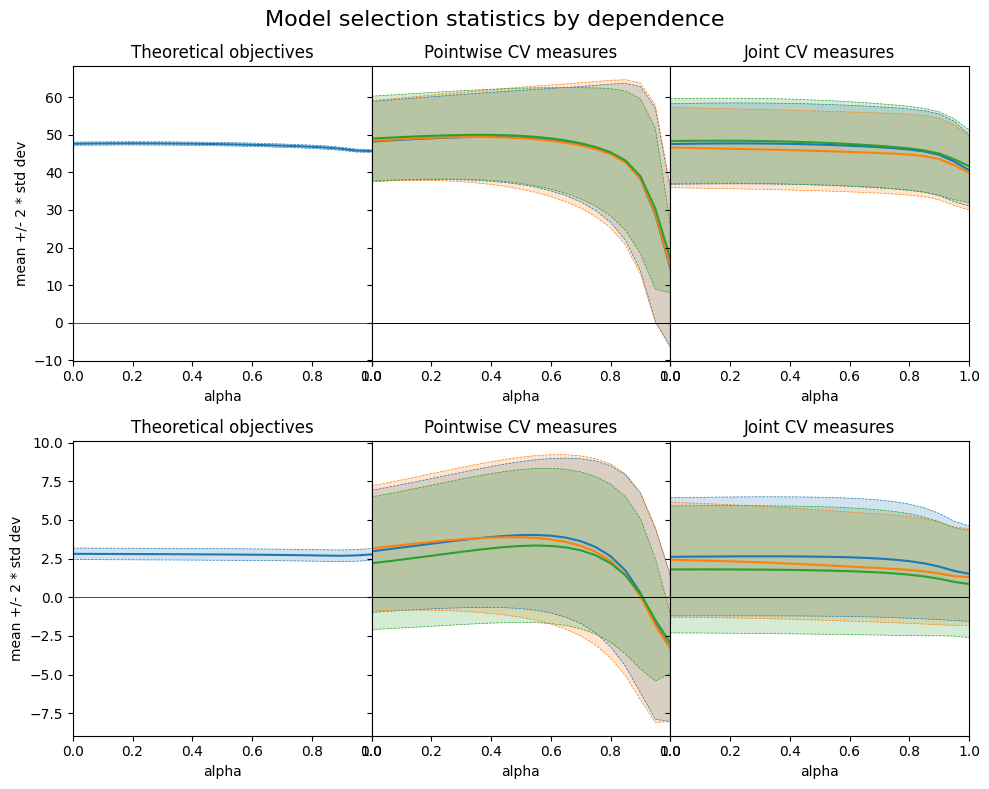

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8), sharey='row')

markers = ["o", "s", "d", "x"]

handles = []

def plot(model, axes):
    # theoretical measures
    schemes = ['eljpd']
    ax = axes[0]
    ax.set_ylabel("mean +/- 2 * std dev")
    ax.axhline(0, color='k', linewidth=0.5)
    ax.set_title('Theoretical objectives')
    ax.set_xlabel("alpha")
    for i, scheme in enumerate(schemes):
        sel = np.bitwise_and((data.model == model), (data.scheme == scheme))
        alpha = data[sel].alpha
        mean = data[sel].bmark_mean
        std = data[sel].bmark_std
        lower, upper = mean - 2 * std, mean + 2 * std
        pl = ax.plot(alpha, mean)
        ax.plot(alpha, lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        ax.plot(alpha, upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        fi = ax.fill_between(alpha, lower, upper, alpha=0.2)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
    for j, scheme_type in enumerate(['pointwise', 'joint']):
        schemes = SCHEMES[scheme_type]
        ax = axes[j+1]
        ax.set_title(f'{scheme_type.title()} CV measures')
        for i, scheme in enumerate(schemes):
            sel = np.bitwise_and((data.model == model), (data.scheme == scheme))
            if sel.sum() == 0:
                print(f"Skipping {scheme} for {model} model")
                continue
            alpha = data[sel].alpha
            mean = data[sel].cv_mean
            std = data[sel].cv_std
            lower, upper = mean - 2 * std, mean + 2 * std
            pl = ax.plot(alpha, mean)
            ax.plot(alpha, lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
            ax.plot(alpha, upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
            fi = ax.fill_between(alpha, lower, upper, alpha=0.2)
            fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
            handles.append((pl[0], fi2[0]))
            if i == 3:
                ax.legend(handles, schemes)
            ax.set_xlabel("alpha")
            ax.axhline(0, color='black', linewidth=0.5)

for ax in axes.ravel():
    ax.set_xlim(0, 1.)

plot('easy', axes[0,:])
plot('hard', axes[1,:])

fig.suptitle("Model selection statistics by dependence", fontsize=16)
fig.tight_layout()

plt.subplots_adjust(wspace=0)

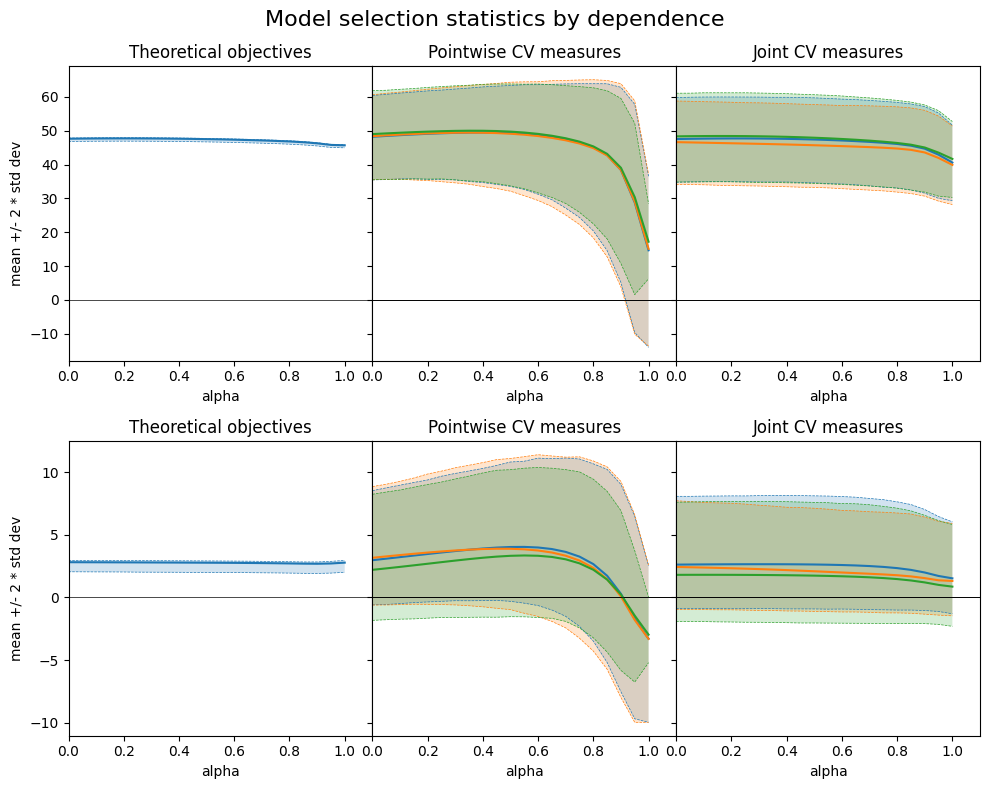

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8), sharey='row')

markers = ["o", "s", "d", "x"]

handles = []

def plot(model, axes):
    # theoretical measures
    schemes = ['eljpd']
    ax = axes[0]
    ax.set_ylabel("mean +/- 2 * std dev")
    ax.axhline(0, color='k', linewidth=0.5)
    ax.set_title('Theoretical objectives')
    ax.set_xlabel("alpha")
    for i, scheme in enumerate(schemes):
        sel = np.bitwise_and((data.model == model), (data.scheme == scheme))
        alpha = data[sel].alpha
        mean = data[sel].bmark_mean
        std = data[sel].bmark_std
        lower, upper = data[sel].lower_q, data[sel].upper_q
        pl = ax.plot(alpha, mean)
        ax.plot(alpha, lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        ax.plot(alpha, upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        fi = ax.fill_between(alpha, lower, upper, alpha=0.2)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
    for j, scheme_type in enumerate(['pointwise', 'joint']):
        schemes = SCHEMES[scheme_type]
        ax = axes[j+1]
        ax.set_title(f'{scheme_type.title()} CV measures')
        for i, scheme in enumerate(schemes):
            sel = np.bitwise_and((data.model == model), (data.scheme == scheme))
            if sel.sum() == 0:
                print(f"Skipping {scheme} for {model} model")
                continue
            alpha = data[sel].alpha
            mean = data[sel].cv_mean
            std = data[sel].cv_std
            lower, upper = data[sel].lower_q, data[sel].upper_q
            pl = ax.plot(alpha, mean)
            ax.plot(alpha, lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
            ax.plot(alpha, upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
            fi = ax.fill_between(alpha, lower, upper, alpha=0.2)
            fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
            handles.append((pl[0], fi2[0]))
            if i == 3:
                ax.legend(handles, schemes)
            ax.set_xlabel("alpha")
            ax.axhline(0, color='black', linewidth=0.5)

for ax in axes.ravel():
    ax.set_xlim(0, 1.1)

plot('easy', axes[0,:])
plot('hard', axes[1,:])

fig.suptitle("Model selection statistics by dependence", fontsize=16)
fig.tight_layout()

plt.subplots_adjust(wspace=0)

In [14]:
def dual_plot(model, plt, axes):
    # theoretical measures
    schemes = ['eljpd', 'elppd']
    uax, lax = axes[0,0], axes[1,0]  # upper and lower axes
    uax.axhline(0, color='k', linewidth=0.5)
    uax.set_title(f'(a) Theoretical objectives')
    uax.tick_params(labelbottom=False)
    lax.set_xlabel(r"Dependence $\alpha$")
    axes[0,0].set_ylabel('std. dev.')
    axes[1,0].set_ylabel('mean and 98% interval')
    #for ax in axes[:,-1]:
        #ax.tick_params(labelright=True)
        #ax.yaxis.set_label_position("right")
        #ax.yaxis.tick_right()
    lax.axhline(0, color='k', linewidth=0.5)
    handles = []
    for i, scheme in enumerate(schemes):
        sel = np.bitwise_and((data.model == model), (data.scheme == scheme))
        alpha = data[sel].alpha
        mean = data[sel].bmark_mean
        std = data[sel].bmark_std
        lower, upper = data[sel].lower_q, data[sel].upper_q
        uax.plot(alpha, std)
        pl = lax.plot(alpha, mean)
        lax.plot(alpha, lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        lax.plot(alpha, upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        fi = lax.fill_between(alpha, lower, upper, alpha=0.2)
        fi2 = lax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
        handles.append((pl[0], fi2[0]))
    uax.legend(handles, schemes, frameon=False)
    for j, scheme_type in enumerate(['pointwise', 'joint']):
        handles = []
        schemes = SCHEMES[scheme_type]
        uax, lax = axes[0,j+1], axes[1,j+1]  # upper and lower axes
        uax.set_title(f'({chr(ord("b")+j)}) {scheme_type.title()} CV measures')
        uax.tick_params(labelbottom=False)
        uax.axhline(0, color='black', linewidth=0.5)
        lax.set_xlabel(r"Dependence $\alpha$")
        lax.axhline(0, color='black', linewidth=0.5)
        for i, scheme in enumerate(schemes):
            sel = np.bitwise_and((data.model == model), (data.scheme == scheme))
            alpha = data[sel].alpha
            mean = data[sel].cv_mean
            std = data[sel].cv_std
            lower, upper = data[sel].lower_q, data[sel].upper_q
            uax.plot(alpha, std)
            pl = lax.plot(alpha, mean)
            lax.plot(alpha, lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
            lax.plot(alpha, upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
            fi = lax.fill_between(alpha, lower, upper, alpha=0.2)
            fi2 = lax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
            handles.append((pl[0], fi2[0]))
        uax.legend(handles, schemes, frameon=False)
    for ax in axes.ravel():
        ax.set_xlim(0, 1.)
        ax.spines[['right', 'top']].set_visible(False)
    for ax in axes[0,:]:
        ax.set_ylim(bottom=0)
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.1, hspace=0.08)


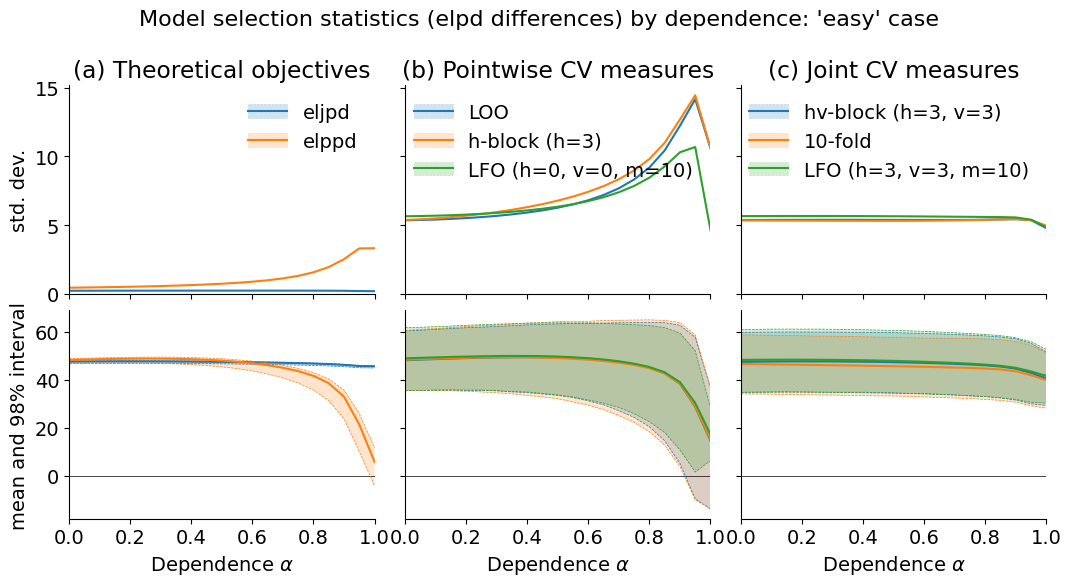

In [15]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 6), sharey='row')
fig.suptitle(f"Model selection statistics (elpd differences) by dependence: 'easy' case", fontsize=16)
dual_plot('easy', fig, axes)
fig.savefig('../../paper/figures/by-alpha-easy.svg', bbox_inches='tight')

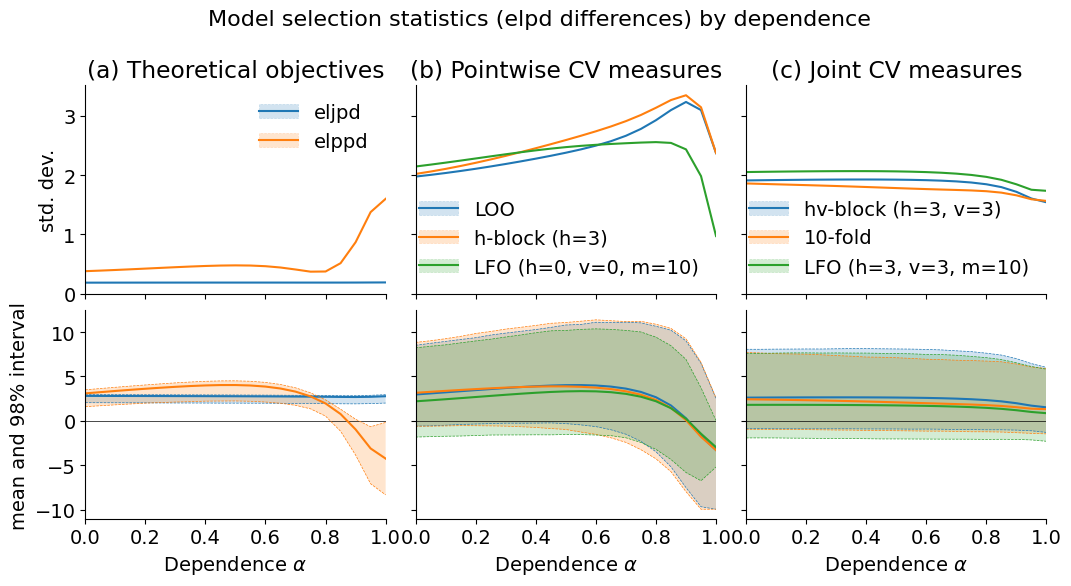

In [17]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 6), sharey='row')
fig.suptitle(f"Model selection statistics (elpd differences) by dependence", fontsize=16)
dual_plot('hard', fig, axes)
fig.savefig('../../paper/figures/by-alpha-hard.svg', bbox_inches='tight')

In [10]:
hdata.scheme.unique()

array(['eljpd', 'elppd', 'LOO', 'hv-block (h=3, v=3)', 'h-block (h=3)',
       '5-fold', '10-fold', 'LFO (h=0, v=0, m=10)',
       'LFO (h=3, v=3, m=10)'], dtype=object)

In [11]:
schememap = {
    'pointwise': ['LFO (h=0, v=0, m=10)', 'LOO'],
    'joint': ['LFO (h=3, v=3, m=10)', 'hv-block (h=3, v=3)'],
}

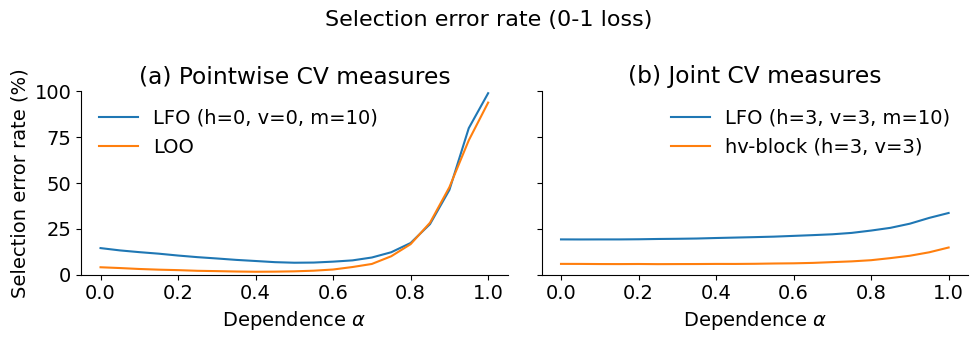

In [12]:
plt.rcParams['font.size'] = 14
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5), sharey='row')

for i, (ax, scheme_type) in enumerate(zip(axes, schememap)):
    for scheme_name in schememap[scheme_type]:
        sel = hdata.scheme == scheme_name
        ax.plot(hdata[sel].alpha, 100. * hdata[sel].negshare)
    ax.set_xlabel(r'Dependence $\alpha$')
    ax.set_ylim(0, 100)
    ax.legend(schememap[scheme_type], frameon=False)
    ax.set_title(f'({chr(ord("a")+i)}) {scheme_type.title()} CV measures')
    ax.spines[['top','right']].set_visible(False)

# axes[1].yaxis.tick_right()
# axes[1].yaxis.set_label_position('right')
# axes[1].yaxis.set_tick_params(labelright=True)
axes[0].set_ylabel('Selection error rate (%)')

fig.suptitle('Selection error rate (0-1 loss)', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(wspace=0.08, hspace=0.0)

fig.savefig('../../paper/figures/lfo-error-rate.svg', bbox_inches='tight')